<h1><strong>Jonathan Revoir - Project 1</strong></h1>

<h2><strong>Introduction</strong></h2>
In August of 2014, Musical.ly, a new social media application focused on lip-syncing and dancing videos, was released to overwhelming success. Based on its overall cultural impact in the mid-2010s, it was aquired by ByteDance in 2018, and merged into their new platform, TikTok. Over the past 7 years since then, TikTok has exploded in popularity, allowing users to create many different types of content, spanning education, comedy, and politics, but the biggest impact that TikTok has had has been in creating viral music. <br>
Because of the short duration of most TikTok trends, the type of music that becomes popular in mainstream media has also become much shorter, often only including a quick verse and multiple iterations of the chorus for the trends. <br>
My goal for this project is to see if my assumptions about song length decreasing over time is correct, or if it is just my own bias in the music I see being created recently. I also want to see if shorter songs are actually more popular than longer songs, and what the ideal length a song should be if it wants to become popular.

<h2>Data Introduction</h2>
The dataset that I will be using is titled "Spotify Dataset 1921-2020, 160k+ Tracks" on Kaggle. <br>
This dataset has 19 attributes; however, the ones that I will be focusing on are the year of release (year), the duration (duration_ms), and popularity (popularity). <br>
There is another data file within this dataset that groups tracks by their genre, which I will also be using. This dataset has 3 main attributes I will be using: genre (genres), duration (duration_ms), and popularity (popularity).

In [212]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [213]:
rawData = pd.read_csv('data/data.csv')
rawGenreData = pd.read_csv('data/data_by_genres.csv')

<h2>Pre-Processing Stage</h2>
For pre-processing, I will be first refining the attributes that I will be using, only taking year, duration_ms, and popularity for data.csv and year, duration_ms, and genres for data_by_genres.csv. I am doing this because they are the relevant attributes to the questions that I am asking.
I will check to find any rows that have a null value and remove them. Luckily, this dataset does not have any null values; however, I have put in a check in case the dataset is updated in the future.
I will be removing any rows that have a popularity score of 0. I am doing this because I believe this does not actually indicate a popularity score of 0, but a blank value where popularity was not recorded. Essentially, I am doing this to remove what were originally null values.
I will also be modifying the duraton_ms values to be in minutes instead of milliseconds and renaming the columns to 'duration_min' for readability on the graphs.
<br>
Because Spotify uses micro-genres in order to accurately recommend music to users, there are thousands of different genres that are used, so I had to write a function that finds the top 10 most common words in the genre column, and then if any genre was had that word in the genre name, replace it with the common name. This will be useful when tracking specific genres as a whole.


In [214]:
df = rawData[['year', 'duration_ms', 'popularity']]
dfGenre = rawGenreData[['genres', 'duration_ms','popularity']]
df = df.dropna()
dfGenre.dropna()
df = df[df['popularity'] >= 1]
dfGenre = dfGenre[dfGenre['popularity'] >= 1]
df['duration_ms'] = df['duration_ms'] / 60000
df = df.rename(columns={'duration_ms':'duration_min'})
df = df[df['duration_min'] <= 10]
dfGenre['duration_ms'] = dfGenre['duration_ms'] / 60000
dfGenre = dfGenre.rename(columns={'duration_ms':'duration_min'})
dfGenre = dfGenre[dfGenre['duration_min'] <= 10]

words = []
for genre in dfGenre['genres']:
    words.extend(re.findall(r'\w+', genre.lower()))
word_counts = Counter(words)
top_10_words = word_counts.most_common(15)

def map_genre(genre):
    for word, i in top_10_words:
        if re.search(r'\b' + re.escape(word) + r'\b', genre, re.IGNORECASE):
            return word
    return genre
dfGenre['genres'] = dfGenre['genres'].apply(map_genre)

<h2>Data Understandings and Visualizations<h2>

This graph shouws the average length of songs per year.

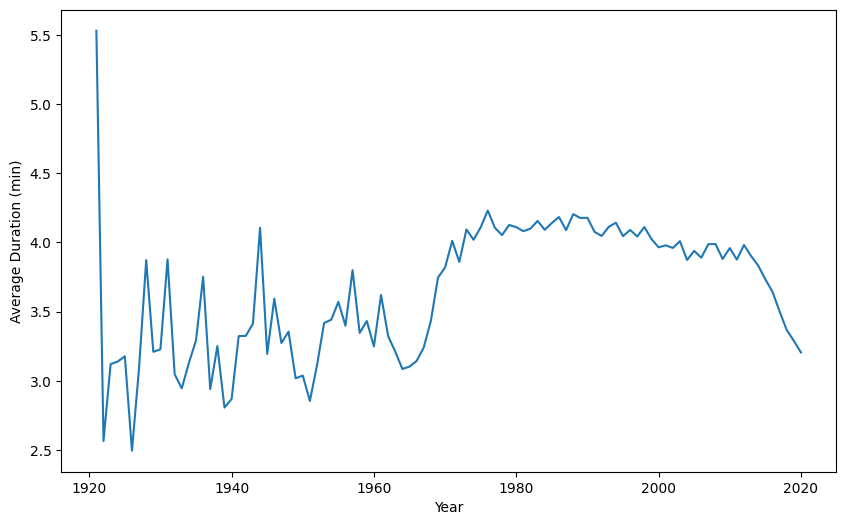

In [215]:
avg_duration_per_year = df.groupby('year')['duration_min'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_duration_per_year['year'], avg_duration_per_year['duration_min'])
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.show()

This graph is similiar to the last but focuses the years 2000-2020. You can see that before 2012, songs were averaging almost 4 minutes, but went on a steady decrease every year until 2020

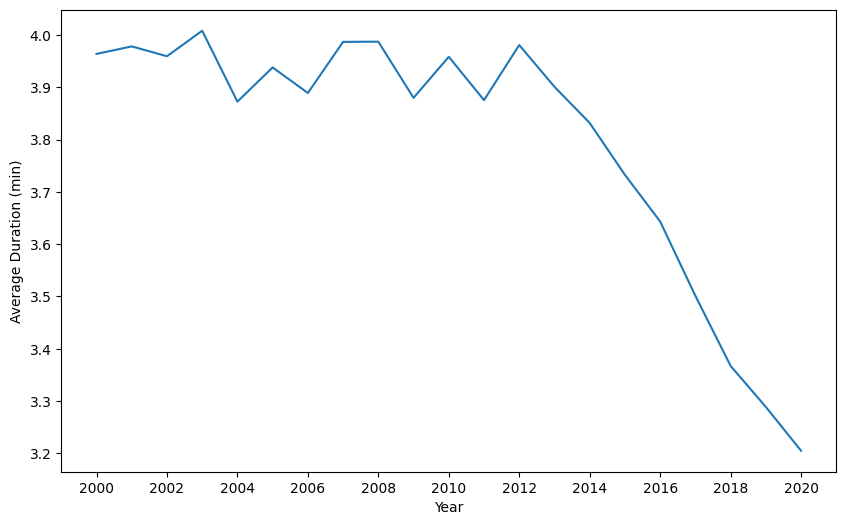

In [216]:
filtered_data = avg_duration_per_year[(avg_duration_per_year['year'] >= 2000) & (avg_duration_per_year['year'] <= 2020)]
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['year'], filtered_data['duration_min'])
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.xticks(ticks=range(2000, 2021, 2))
plt.show()

This graph plots the relationship between song duration and popularity of the entire dataset. You can see a steady increase in popularity until roughly 4 minutes before it slowly decreases as time goes on

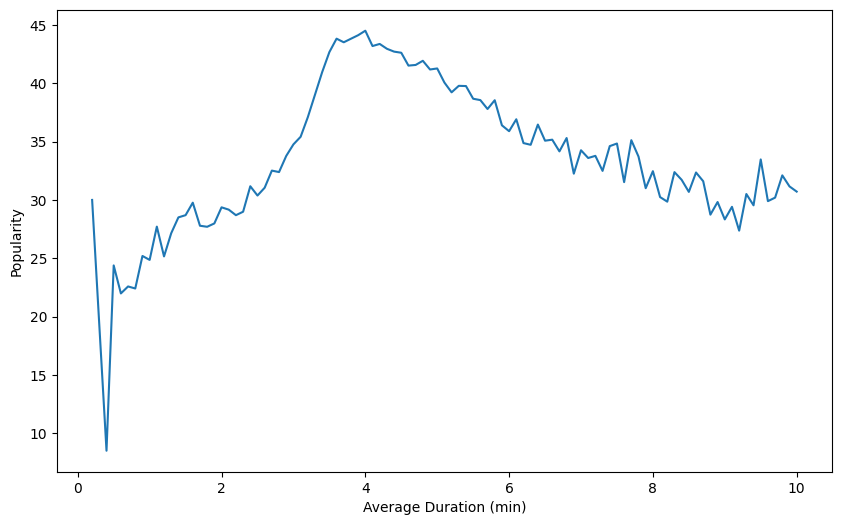

In [217]:
avg_popularity_per_min = df.groupby(df['duration_min'].round(1))['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_popularity_per_min['duration_min'], avg_popularity_per_min['popularity'])
plt.xlabel('Average Duration (min)')
plt.ylabel('Popularity')
plt.show()

Next, looking at the relationship between song length and popularity of songs created between 2010 and 2020. As you can see, music peaks in popularity before the two minute mark before slowly decreasing as time continues. 

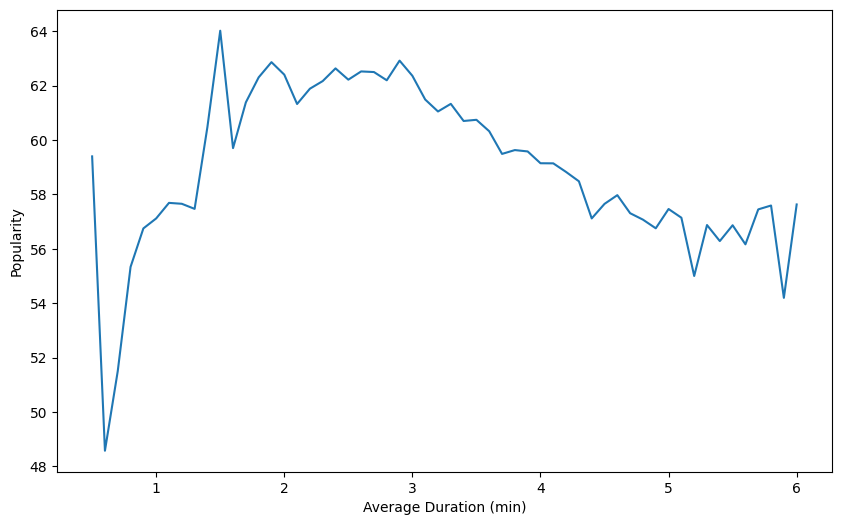

In [218]:
avg_popularity_per_min = df[(df['year'] >= 2010) & (df['year'] <= 2020) & (df['duration_min'] < 6)].groupby(df['duration_min'].round(1))['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_popularity_per_min['duration_min'], avg_popularity_per_min['popularity'])
plt.xlabel('Average Duration (min)')
plt.ylabel('Popularity')
plt.show()



These next graphs look at the relationship music and popularity of the top 5 most listened to genres: pop, indie, rock, metal, and classical. Though this data is much more volatile, you can see that pop, indie, and metal all follow roughly the same trends as the main dataset, with peaks around four minutes, wheras classical music tends to have more popularity when the tracks are much longer

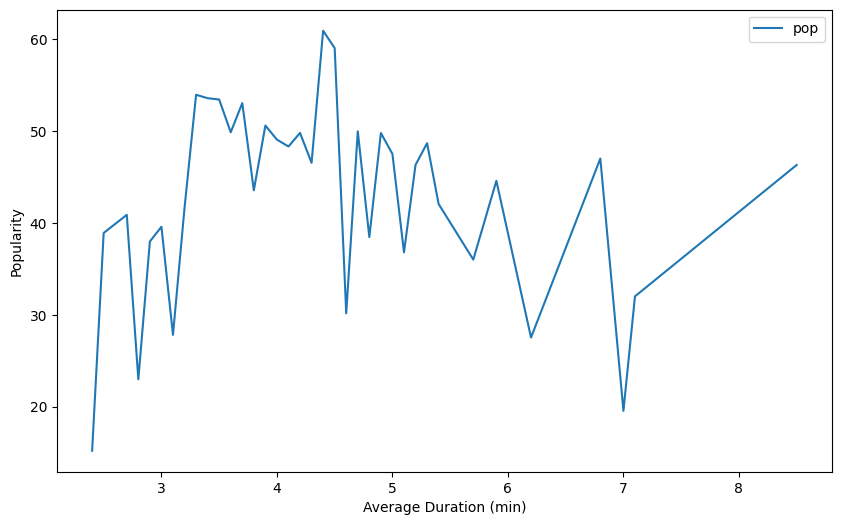

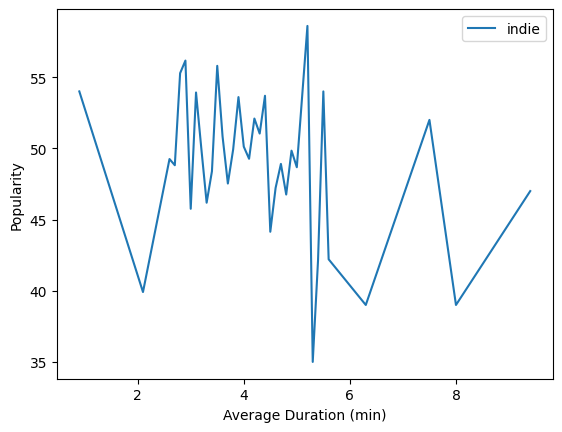

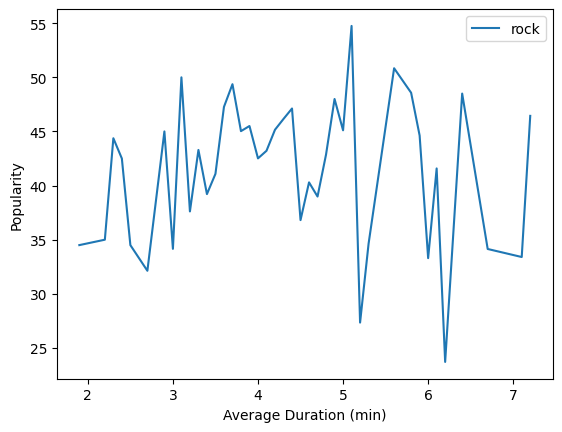

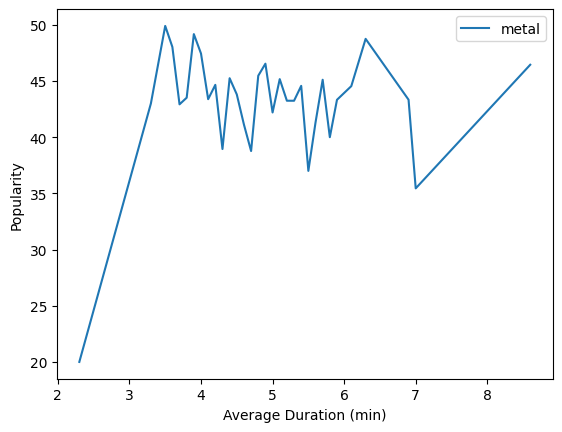

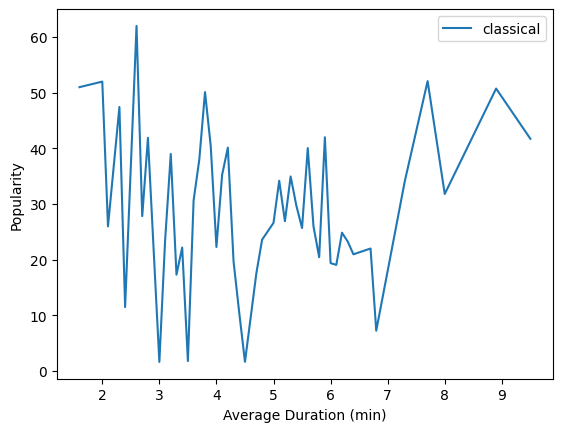

In [219]:
top_5_genres = dfGenre['genres'].value_counts().head(5).index
filtered_data = dfGenre[dfGenre['genres'].isin(top_5_genres)]

plt.figure(figsize=(10, 6))
for genre in top_5_genres:
    genre_df = filtered_data[filtered_data['genres'] == genre]
    
    avg_popularity_per_genre = genre_df.groupby(genre_df['duration_min'].round(1))['popularity'].mean().reset_index()
    plt.plot(avg_popularity_per_genre['duration_min'], avg_popularity_per_genre['popularity'], label=genre)
    plt.xlabel('Average Duration (min)')
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()



<h2>Story</h2>
From these visualizations, we can see that my original assessment that music has been getting shorter over the past decade was correct. Since 2012, music duration has gone from 4 minutes to 3 minutes, and if this dataset were to show songs between 2020 and 2025, I believe that this would continue to trend down to under 2 minutes a song. <br> <br>
I also originally suspected that music popularity would increase the shorter a song was, which was also supported by the visualization of duration vs popularity in songs between 2010 and 2020. Compared to songs historically, which had a peak popularity around 4 minutes, music released between 2010 and 2020 had a peak popularity at less than 2 minutes. I think this is the main cause of why music has been getting shorter in the last decade. People will hear a snippit of a song on social media and become hooked to that specific section of a song, and only really wanting to listen to a short bit of a track, which leads artists to make thier music short as well. 

<h2>Impact</h2>
I think this project could impact both music publishers and artists who want to create popular music. By seeing the impact that shorter music is having on overall popularity, artists can tailor their new releases to fit the trend that can be seen. 

I do think this data could cause possible harm to music as an art form. I am a firm believer that short, viral music takes away from an artists ability to create a complete work. When I think about music that has had a profound impact on my life and the world around me, it isn't 2 minute songs that I found on TikTok, it's songs that made me sit down and experience it for 4 to 5 minutes, and I think that by moving away from longer music, we as a people are losing out on so much impactful music.

I think the biggest thing missing from this work is music that has been created between 2020 and 2025. TikTok has become a much bigger platform in the past 5 years than it was before, and it has become an even more important part of music marketing for artists. I think that by looking at data from these years we could make a much more insightful opinion of the change in music length and popularity.

<h2>References</h2>
<a href="https://github.com/Jonrevoir/ITCS3162_Project1">You can find my Jupyter Notebook here</a> <br><br>
<a href="https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks?select=data.csv">Dataset</a>